fintalk 2018/12/16 Homework
==

◆宿題：
--
今日の終値と明日の始値を比べて窓が開いている時に、（翌日の）始値で買ってその日の終値で売る、というSimulation をして来てください。

もし、余裕があったら、（前日の終値よりも本日の始値が高い状態が）n回続いた時のSimulation（酒田五法の三空踏み上げ）もやってみてください。


◆参考：
--
はじめてのテクニカル分析　マネックス証券　ローソク足分析
[「酒田五法」](https://info.monex.co.jp/technical-analysis/indicators/013.html)



◆宿題用にダウンロードしたデータ：
--
日経平均株価（日次データ）2018/12/30 15時時点

リンク先の [ダウンロードセンターの表](https://indexes.nikkei.co.jp/nkave/index?type=download) から

行：日経平均株価、列：日次データの箇所にあるCSVファイルのアイコンをクリックしてダウンロード



◆宿題の環境：
--
OS: Windows10（64bit）,Python環境: Anaconda (Python3.6環境)の仮想環境

＊事前インストール: Python, jupyter, numpy, pandas, matplotlib（※宿題では使わなかったが　ta-lib　も事前インストールした）

＊コンソールの起動方法：Anaconda Promptを起動して、起動後にPython3.6環境をActivateしてから実行

＊Jupyter Notebookの起動：コンソールから jupyter notebook + Enter　→ブラウザでJupyter Notebookが起動する



◆ファイルパス：
--

▼Notebook:
--
＊Jupyter NotebookのFileタブに参照可能なフォルダとファイルが表示されるので、選択してクリックして、該当のNotebookを起動する。 
 
＊なお、以下のフォルダの下が参照可能となるので、このNotebookを実行する場合、同じWindows10, Anaconda環境の場合は、以下のフォルダの配下にあるいずれかのフォルダの中にNotebookを保存してから参照・実行する。

C:\Users\【ユーザー名のフォルダ】
  
＊Notebookの中のPythonプログラムで参照するファイルパスについては、上のしばりはないので、任意のものが参照・指定可能。
 

▼Downloadしたファイル:
--
＊このNotebookでは、ダウンロードしたファイルを、以下のフォルダの下に移動・保存して、プログラムの中で参照・利用しました。
 
　C:\Work\Tech\Python\fintalk_holiday_work\20181230

In [2]:
import pandas as pd 

# 実行者の環境に依存するので適宜変更する
fpath = '/Work/Tech/Python/fintalk_holiday_work/20181230/nikkei_stock_average_daily_jp.csv'
#fpath = '/tmp/nikkei_stock_average_daily_jp.csv'
df = pd.read_csv(fpath, 
                 encoding="shift-jis", # ここを外すとエンコードエラーが出る
                 index_col="データ日付", # index コラムを指定
                 )

# 最終行にいらないコメントが入っているのでそれを除去
# 慣習としてDataFrameの変数はdfとされる場合が多い
df = df.iloc[:-1] 

# DataFrame を確認するために、tail()で最終行を確認。.head() でもOK
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/12/21,20166.19,20310.50,20334.73,20006.67
2018/12/25,19155.74,19785.43,19785.43,19117.96
2018/12/26,19327.06,19302.59,19530.35,18948.58
2018/12/27,20077.62,19706.19,20211.57,19701.76
2018/12/28,20014.77,19957.88,20084.38,19900.04


In [3]:
#ここから、データ日付のデータ型を確認する。数字や日付であってほしいデータが文字列オブジェクトであったりすることがよくあるため。

#まずはindexのデータ日付の型を確認する。
#具体的には dtype=datetime であるか確認をする。
df.index

#この場合、結果が　文字列オブジェクト dtype='object' と表示されるため、次のcellでデータ型を変換する。

Index(['2015/01/05', '2015/01/06', '2015/01/07', '2015/01/08', '2015/01/09',
       '2015/01/13', '2015/01/14', '2015/01/15', '2015/01/16', '2015/01/19',
       ...
       '2018/12/14', '2018/12/17', '2018/12/18', '2018/12/19', '2018/12/20',
       '2018/12/21', '2018/12/25', '2018/12/26', '2018/12/27', '2018/12/28'],
      dtype='object', name='データ日付', length=981)

In [4]:
#index列のデータ型を datetime　に変換
df.index = pd.to_datetime(df.index)
df.index

#結果が　dtype='datetime64[ns]' と表示される。

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-01-16', '2015-01-19',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='データ日付', length=981, freq=None)

In [5]:
# 次から価格の各列のデータ型を順に確認していく。
# dtypeが数値型であればOK。

# まずは、終値。
df["終値"].head()

#dtype: float64　と表示される。

データ日付
2015-01-05    17408.71
2015-01-06    16883.19
2015-01-07    16885.33
2015-01-08    17167.10
2015-01-09    17197.73
Name: 終値, dtype: float64

In [6]:
# 次は、始値のデータ型（dtype）が数値型であるか確認。
df["始値"].head()

#dtype: float64　と表示される。

データ日付
2015-01-05    17325.68
2015-01-06    17101.58
2015-01-07    16808.26
2015-01-08    17067.40
2015-01-09    17318.74
Name: 始値, dtype: float64

In [7]:
# 次は、高値のデータ型（dtype）が数値型であるか確認。
df["高値"].head()

#dtype: float64　と表示される。

データ日付
2015-01-05    17540.92
2015-01-06    17111.36
2015-01-07    16974.61
2015-01-08    17243.71
2015-01-09    17342.65
Name: 高値, dtype: float64

In [8]:
# 次は、安値のデータ型（dtype）が数値型であるか確認。
df["安値"].head()

#dtype: float64　と表示される。

データ日付
2015-01-05    17219.22
2015-01-06    16881.73
2015-01-07    16808.26
2015-01-08    17016.09
2015-01-09    17129.53
Name: 安値, dtype: float64

In [9]:
#列名を日本語から英語に変える場合は、以下のように指定して変換する。
df = df.rename(columns={"終値":"close", "始値":"open", "高値":"high", "安値":"low"})
df.head()

,close,open,high,low
データ日付,,,,
2015-01-05,17408.71,17325.68,17540.92,17219.22
2015-01-06,16883.19,17101.58,17111.36,16881.73
2015-01-07,16885.33,16808.26,16974.61,16808.26
2015-01-08,17167.10,17067.40,17243.71,17016.09
2015-01-09,17197.73,17318.74,17342.65,17129.53


In [10]:
# 一旦index化した列名は、このように指定して変更する。
df.index.name = "datetime"
df.head()

,close,open,high,low
datetime,,,,
2015-01-05,17408.71,17325.68,17540.92,17219.22
2015-01-06,16883.19,17101.58,17111.36,16881.73
2015-01-07,16885.33,16808.26,16974.61,16808.26
2015-01-08,17167.10,17067.40,17243.71,17016.09
2015-01-09,17197.73,17318.74,17342.65,17129.53


In [11]:
#ここから元データを加工するので一旦コピーする
df_hw = df.copy()

#今日の始値と終値を含む価格の列の右側に、前日の終値を並べる
df_hw["yesterday's close"] = df_hw["open"].shift(1)

#結果をDataframeの冒頭から10行とって確認する（指定しなければ５行表示される）
df_hw.head(10)

,close,open,high,low,yesterday's close
datetime,,,,,
2015-01-05,17408.71,17325.68,17540.92,17219.22,NaN
2015-01-06,16883.19,17101.58,17111.36,16881.73,17325.68
2015-01-07,16885.33,16808.26,16974.61,16808.26,17101.58
2015-01-08,17167.10,17067.40,17243.71,17016.09,16808.26
2015-01-09,17197.73,17318.74,17342.65,17129.53,17067.40
2015-01-13,17087.71,16970.88,17087.71,16828.27,17318.74
2015-01-14,16795.96,16961.82,17036.72,16770.56,16970.88
2015-01-15,17108.70,16872.95,17141.98,16856.22,16961.82
2015-01-16,16864.16,16812.96,16864.34,16592.57,16872.95


In [12]:
#前日の終値に対する本日の始値の割合を出してから、1を引くことで収益分に該当する差分を計算する
df_hw["overnight return"] = df_hw["open"] / df_hw["yesterday's close"] - 1

#上で計算したovernightの収益が正の値であればTrueの判断をするように、Bool値で判断をする
df_hw["is overnight return positive"] = df_hw["overnight return"] > 0 

#結果をDataframeの冒頭から10行とって確認する（指定しなければ５行表示される）
df_hw.head(10)

,close,open,high,low,yesterday's close,overnight return,is overnight return positive
datetime,,,,,,,
2015-01-05,17408.71,17325.68,17540.92,17219.22,NaN,NaN,False
2015-01-06,16883.19,17101.58,17111.36,16881.73,17325.68,-0.012935,False
2015-01-07,16885.33,16808.26,16974.61,16808.26,17101.58,-0.017152,False
2015-01-08,17167.10,17067.40,17243.71,17016.09,16808.26,0.015417,True
2015-01-09,17197.73,17318.74,17342.65,17129.53,17067.40,0.014726,True
2015-01-13,17087.71,16970.88,17087.71,16828.27,17318.74,-0.020086,False
2015-01-14,16795.96,16961.82,17036.72,16770.56,16970.88,-0.000534,False
2015-01-15,17108.70,16872.95,17141.98,16856.22,16961.82,-0.005239,False
2015-01-16,16864.16,16812.96,16864.34,16592.57,16872.95,-0.003555,False


In [13]:
#本日の始値で買って本日の終値で売った場合の収益（日中収益率=intraday return）を計算する
df_hw["intraday return"] = df_hw["close"] / df_hw["open"] - 1

#参考までに始値で買って終値で売った収益（日中収益率=intraday return）のBool値も加えておく
df_hw["is intraday return positive"] = df_hw["intraday return"] > 0 

#Bool値は1か0なので、特定の値に乗ずることで、結果がpositive(つまりTrueで1)だった場合の値のみ得られる
#ここでは、前日の始値より本日の始値が高い（=窓が開いている）場合、つまり"is overnight return"がTrueだった場合に
#本日の始値で買って本日の終値で売った収益（日中収益率=intraday return）を 'return'　に格納する
df_hw["results"] = df_hw["is overnight return positive"] * df_hw["intraday return"]

#結果をDataframeの冒頭から10行とって確認する（指定しなければ５行表示される）
df_hw.head(10)

,close,open,high,low,yesterday's close,overnight return,is overnight return positive,intraday return,is intraday return positive,results
datetime,,,,,,,,,,
2015-01-05,17408.71,17325.68,17540.92,17219.22,NaN,NaN,False,0.004792,True,0.000000
2015-01-06,16883.19,17101.58,17111.36,16881.73,17325.68,-0.012935,False,-0.012770,False,-0.000000
2015-01-07,16885.33,16808.26,16974.61,16808.26,17101.58,-0.017152,False,0.004585,True,0.000000
2015-01-08,17167.10,17067.40,17243.71,17016.09,16808.26,0.015417,True,0.005842,True,0.005842
2015-01-09,17197.73,17318.74,17342.65,17129.53,17067.40,0.014726,True,-0.006987,False,-0.006987
2015-01-13,17087.71,16970.88,17087.71,16828.27,17318.74,-0.020086,False,0.006884,True,0.000000
2015-01-14,16795.96,16961.82,17036.72,16770.56,16970.88,-0.000534,False,-0.009778,False,-0.000000
2015-01-15,17108.70,16872.95,17141.98,16856.22,16961.82,-0.005239,False,0.013972,True,0.000000
2015-01-16,16864.16,16812.96,16864.34,16592.57,16872.95,-0.003555,False,0.003045,True,0.000000


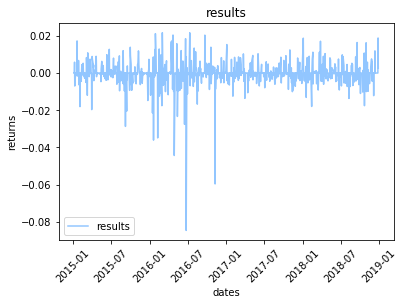

In [14]:
#matplotlibを使って、結果をグラフで描画する
import matplotlib.pyplot as plt 
import matplotlib

# matplotlibのstyleを指定する　参考： - Qiita https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba
#plt.style.use('ggplot')
#参考情報を見て、パステルカラーのスタイルを指定
plt.style.use('seaborn-pastel')

#インラインで表示する指定
%matplotlib inline

#resultsをプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_hw["results"])

# タイトル、軸ラベル設定
ax.set_title("results")
ax.set_xlabel("dates")
ax.set_ylabel("returns")

# 凡例を表示する
ax.legend()

# xラベルを45度回転
plt.setp(ax.get_xticklabels(), rotation=45)

#結果を表示
plt.show()


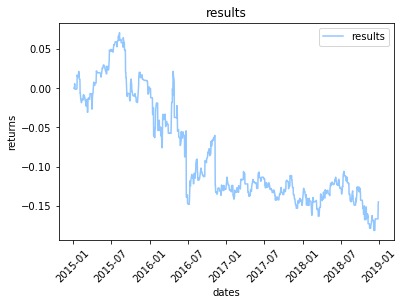

In [15]:
# resultsの毎日の結果を足し合わせていってプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_hw["results"].cumsum())

# タイトル、軸ラベル設定
ax.set_title("results")
ax.set_xlabel("dates")
ax.set_ylabel("returns")

# 凡例を表示する
ax.legend()

# xラベルを45度回転
plt.setp(ax.get_xticklabels(), rotation=45)

#結果を表示
plt.show()

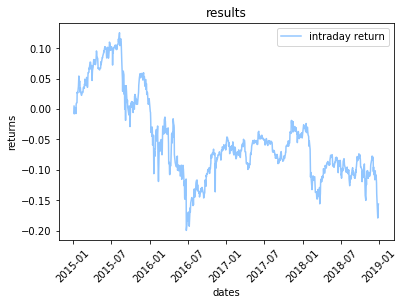

In [16]:
#参考までに、intraday returnをpositiveの判断をせず単純に累計してプロットした場合
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_hw["intraday return"].cumsum())

# タイトル、軸ラベル設定
ax.set_title("results")
ax.set_xlabel("dates")
ax.set_ylabel("returns")

# 凡例を表示する
ax.legend()

# xラベルを45度回転
plt.setp(ax.get_xticklabels(), rotation=45)

#結果を表示
plt.show()

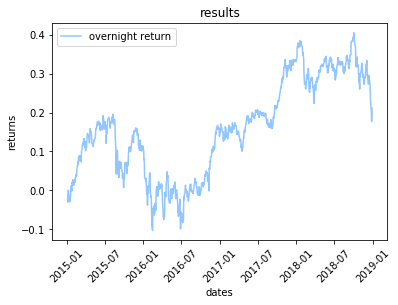

In [17]:
#参考までに、overnight returnをpositiveの判断をせず単純に累計してプロットした場合
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_hw["overnight return"].cumsum())

# タイトル、軸ラベル設定
ax.set_title("results")
ax.set_xlabel("dates")
ax.set_ylabel("returns")

# 凡例を表示する
ax.legend()

# xラベルを45度回転
plt.setp(ax.get_xticklabels(), rotation=45)

#結果を表示
plt.show()

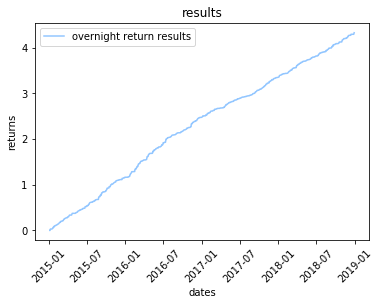

In [18]:
#参考までに、終値で売買できる時間内に翌日の始値が調べられて
#その場合のovernight returnがpositiveの時だけ
#ある日の終値で買って翌日の始値で売って、収益を累計した場合
df_hw["overnight return results"] = df_hw["is overnight return positive"] * df_hw["overnight return"]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_hw["overnight return results"].cumsum())

# タイトル、軸ラベル設定
ax.set_title("results")
ax.set_xlabel("dates")
ax.set_ylabel("returns")

# 凡例を表示する
ax.legend()

# xラベルを45度回転
plt.setp(ax.get_xticklabels(), rotation=45)

#結果を表示
plt.show()

Simulationの結果
--
過去４年の日経平均株価のトレンドからすると、あまり有効な方法ではない。

有効ではなかった理由として、そもそも売買の内容である、その日の始値で買って終値で売る場合の収益（日次収益率 = intraday return）が過去４年の日経平均株価ではnegativeな結果になっていることがあげられそう。

むしろ、売買の条件に採用された、ある日の終値で買って翌日の始値で売る場合の収益（overnight return）で単純に取引を継続する方がよい結果が出ている。当然ながら、翌日の始値を調べてovenight returnがpositiveだった時だけ売買できた方が、さらによい結果になる。

酒田五法の三空踏み上げを参考にしたシミュレーション
--
前日の終値より本日の始値が高い（=窓が開いている）状態がn回続いた時に、本日の始値で買って、本日の終値で売るシミュレーション

In [19]:
#n日の値の初期値を格納する
num_days = 3

#ここから元データを加工するので一旦コピーする
df_hw2 = df.copy()

#必要な列だけ取り出す
df_hw2 = df_hw2[["close","open"]]

#本日の始値で買って本日の終値で売った場合の収益（日中収益率=intraday return）を計算する
df_hw2["intraday return"] = df_hw2["close"] / df_hw2["open"] - 1

#前日の終値に対する本日の始値の割合を出してから、1を引くことで収益分に該当する差分を計算する
df_hw2["yesterday's close"] = df_hw2["open"].shift(1)
df_hw2["overnight return"] = df_hw2["open"] / df_hw2["yesterday's close"] - 1

#上で計算したovernight returnの値がpositive（正の値）であればTrueの判断をするように、Bool値で判断をする
df_hw2["is overnight return positive"] = df_hw2["overnight return"] > 0 

#過去n日連続してovernight returnがpositiveであればTrueの判断をするように、Bool値の掛け算で判断をする
#n日連続してTrueであれば結果は1になるが、それ以外は0になる
df_hw2["is n-days positive"] = df_hw2["is overnight return positive"]

for i in range(num_days-1): # pythonのrangeは0から始まるので注意、上限のrangeはnum_daysから-1して、中の日数もi+1する
    df_hw2["is n-days positive"] = df_hw2["is n-days positive"] * df_hw2["is overnight return positive"].shift(i+1)

#過去３日連続してovernight returnがpositiveであれば（"is n-days positive"）であれば
#本日の始値で買って終値で売る取引（intraday return）を実行してresultに格納する
df_hw2["results"] = df_hw2["is n-days positive"] * df_hw2["intraday return"]

#結果をDataframeの冒頭から50行とって確認する（指定しなければ５行表示される）
df_hw2.head(50)

,close,open,intraday return,yesterday's close,overnight return,is overnight return positive,is n-days positive,results
datetime,,,,,,,,
2015-01-05,17408.71,17325.68,0.004792,NaN,NaN,False,NaN,NaN
2015-01-06,16883.19,17101.58,-0.012770,17325.68,-0.012935,False,NaN,NaN
2015-01-07,16885.33,16808.26,0.004585,17101.58,-0.017152,False,0,0
2015-01-08,17167.10,17067.40,0.005842,16808.26,0.015417,True,0,0
2015-01-09,17197.73,17318.74,-0.006987,17067.40,0.014726,True,0,-0
2015-01-13,17087.71,16970.88,0.006884,17318.74,-0.020086,False,0,0
2015-01-14,16795.96,16961.82,-0.009778,16970.88,-0.000534,False,0,-0
2015-01-15,17108.70,16872.95,0.013972,16961.82,-0.005239,False,0,0
2015-01-16,16864.16,16812.96,0.003045,16872.95,-0.003555,False,0,0


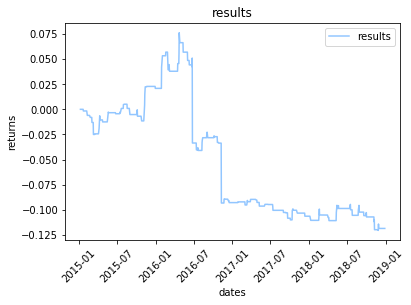

In [20]:
# resultsの毎日の結果を足し合わせていってプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_hw2["results"].cumsum())

# タイトル、軸ラベル設定
ax.set_title("results")
ax.set_xlabel("dates")
ax.set_ylabel("returns")

# 凡例を表示する
ax.legend()

# xラベルを45度回転
plt.setp(ax.get_xticklabels(), rotation=45)

#結果を表示
plt.show()

Simulationの結果
--
前の結果から予想されるが、過去４年の日経平均株価に対しては、あまり良い方法ではない。
ただし、2016年の間に限定すると、よい結果になっていた。


しんせいたろうメモ
--

素晴らしいです。間違ってないと思います。

`df_hw2["is n-days positive"]` の計算が難しくて大変だったと思いますが、ちゃんと出来ていますね。


参考程度にわたしはこう書きます、というのを書いておきますね。

`df_hw2["is overnight return positive"]` がTrue/Falseなので、1/0 のどちらかということになります。

いま、num_days=3 なので、rollingメソッドを使って 毎日過去3日間の足し算を計算し、

それが3であれば、過去三日間毎日Trueが立っていたという事になります。これを利用して、`df_hw2["is n-days positive"] ` のフラグをたてます。

ループを書かなくても良くなるので処理時間も速くなります。


In [21]:
df_hw2["is n-days positive"] = df_hw2["is overnight return positive"].rolling(window=num_days).sum()


In [22]:

df_hw2["is n-days positive"] = df_hw2["is n-days positive"] == num_days
df_hw2["is n-days positive"] 

datetime
2015-01-05    False
2015-01-06    False
2015-01-07    False
2015-01-08    False
2015-01-09    False
2015-01-13    False
2015-01-14    False
2015-01-15    False
2015-01-16    False
2015-01-19    False
2015-01-20    False
2015-01-21     True
2015-01-22    False
2015-01-23    False
2015-01-26    False
2015-01-27    False
2015-01-28    False
2015-01-29    False
2015-01-30    False
2015-02-02    False
2015-02-03    False
2015-02-04    False
2015-02-05    False
2015-02-06    False
2015-02-09     True
2015-02-10    False
2015-02-12    False
2015-02-13    False
2015-02-16    False
2015-02-17    False
              ...  
2018-11-15    False
2018-11-16    False
2018-11-19    False
2018-11-20    False
2018-11-21    False
2018-11-22    False
2018-11-26    False
2018-11-27     True
2018-11-28     True
2018-11-29     True
2018-11-30    False
2018-12-03    False
2018-12-04    False
2018-12-05    False
2018-12-06    False
2018-12-07    False
2018-12-10    False
2018-12-11    False
2018-12-12 

しんせいたろうメモを読んでのコメント
--

大晦日に丁寧なチェックをいただき、ありがとうございます！

なるほど、rollingを使うとほんの数行でシンプルに高速な処理が書けるんですね！


ローソク足のグラフ
--

蛇足ですが、せっかくなので、この日経平均株価のデータを使って
fin-pyで出てきたローソク足のグラフを書くのを試してみました。

→　12月の１ヶ月の動きをみると、クリスマスに向けて下がった後、新年に向けて上がる動きがありました。（ご祝儀相場かな？）
--



１．ローソク足のプロット関数（mpl_finance）のインストール
--
pip install mpl_finance



２．使い方
--

▼インポート時の指定方法
--
from mpl_finance import candlestick_ochl



▼関数への変数の指定方法
--
candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)



ax : ax これは何だろう？？？

quotes : (time, open, close, high, low)で並んだ配列。

＊quotesで指定する時間（time）のデータ型はfloatにする必要がある。

width : ローソクの幅のサイズ指定 

colorup : 価格が上昇する場合のローソクの色の指定 'g':緑　'k':黒  'w':白（背景が白いので消えて見える）

colordown : 価格が下降する場合のローソクの色の指定 'r':赤　'k':黒 'b':青

alpha: ローソクの色の濃さの指定。省略可能。1.0～0.1の間で指定可能で小さい数ほど透明度があがる。


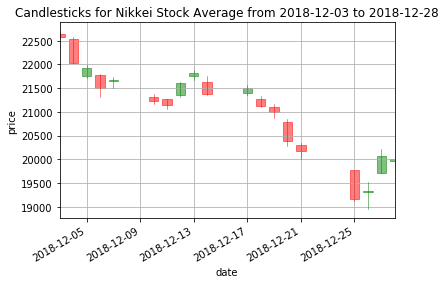

In [56]:
from matplotlib.dates import date2num
from mpl_finance import candlestick_ochl

# 実行者の環境に依存するので適宜変更する
fpath = '/Work/Tech/Python/fintalk_holiday_work/20181230/nikkei_stock_average_daily_jp.csv'

df_hw3 = pd.read_csv(fpath, 
                 encoding="shift-jis", # ここを外すとエンコードエラーが出る
                 index_col="データ日付", # index コラムを指定
                 )

#df_hw3 #データの冒頭と末尾を確認　→　最終行に不要なコメントが入っていることがわかる

# 最終行にいらないコメントが入っているのでそれを除去
df_hw3 = df_hw3.iloc[:-1] 

#df_hw3.index #indexのデータ型が dtype='object'で日付型ではないことがわかる

#index列のデータ型を datetime　に変換
df_hw3.index = pd.to_datetime(df_hw3.index)
#df_hw3.index #データ型が dtype='datetime64[ns]'に変更されたことを確認

#価格の各列のデータ型（dtype）が数値型であるか確認。
#df["終値"].head() #結果　→　dtype: float64　と表示され数値型とわかるので問題なし。
#df["始値"].head() #結果　→　dtype: float64　と表示され数値型とわかるので問題なし。
#df["高値"].head() #結果　→　dtype: float64　と表示され数値型とわかるので問題なし。
#df["安値"].head() #結果　→　dtype: float64　と表示され数値型とわかるので問題なし。


#列名を日本語から英語に変える場合は、以下のように指定して変換する。
df_hw3 = df_hw3.rename(columns={"終値":"close", "始値":"open", "高値":"high", "安値":"low"})
#df_hw3.head()


# 一旦index化した列名は、このように指定して変更する。
df_hw3.index.name = "date"

begdate = "2018-12-03"
enddate = "2018-12-28"
df_hw3 = df_hw3.loc[begdate:enddate]
df_hw3.head()
fig, ax = plt.subplots()

# dateを数値化する
df_hw3["date"] = date2num(df_hw3.index)

# time, open, close, high, low の順に並ばせつつ必要なデータだけ取得。
df_hw3 = df_hw3[["date", "open", "close", "high", "low"]]

# 二次元配列に変換
quotes = df_hw3.values
candlestick_ochl(ax, quotes, width=0.7, colorup='g', colordown='r', alpha=0.5)

ax.set_xlim(df_hw3.index[0].date(), df_hw3.index[-1].date())  # x軸の範囲
ax.grid()  # グリッド表示
ax.set_xlabel("date")
ax.set_ylabel("price")
ax.set_title("Candlesticks for Nikkei Stock Average from {} to {}".format(begdate,enddate))

fig.autofmt_xdate() 